<a href="https://colab.research.google.com/github/baraabouzaiene/Machine-Learning-Data-Science/blob/main/titanic%20survival%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                    ***Titanic survival preediction using machine learning***

-  In this project, we predict passenger survival on the Titanic using several Machine Learning models.
- Dataset: Titanic dataset from Kaggle
- Models :
    - Logistic Regression
    - Decision Tree
    - Random Forest
    - KNN
    - SVM

#**1.import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#**2.Load & explore dataset**

In [ ]:
#unzip
import zipfile
with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('titanic')
df = pd.read_csv('titanic/Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#basic exploration
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#**3. data cleaning/preprocessing**

In [ ]:
# select useful features
X = df[["Sex", "Pclass", "Age"]].copy()
y = df["Survived"]


In [ ]:
# encode 'Sex'
X["Sex"] = X["Sex"].map({"male": 0, "female": 1})



In [ ]:
# handle missing values
X["Age"] = X["Age"].fillna(X["Age"].mean())

#**4. train/test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

#**5. models**

In [ ]:
# importation of models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}


In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy of {name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Accuracy of Logistic Regression: 0.8101
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

--------------------------------------------------
Accuracy of Decision Tree: 0.7765
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179

--------------------------------------------------
Accuracy of Random Forest: 0.7933
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78    

#**6. evaluation(bar chart)**

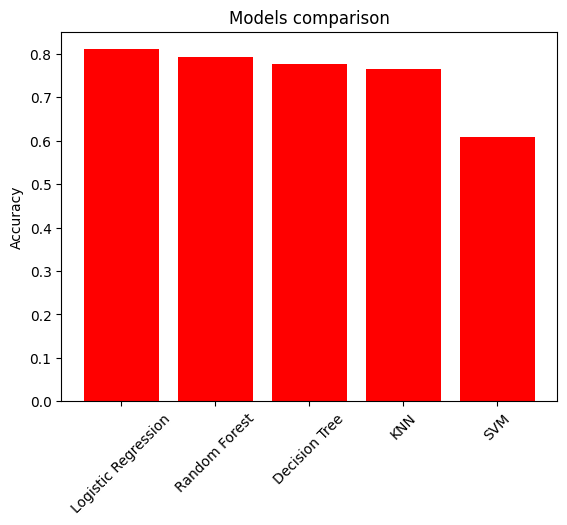

In [ ]:
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))
plt.bar(sorted_results.keys(), sorted_results.values(),color='red')
plt.ylabel("Accuracy")
plt.title("Models comparison")
plt.xticks(rotation=45)
plt.show()

# **Conclusion:**
   -Random Forest and Logistic Regression achieved the best performance on this dataset. Decision Trees performed worse, likely due to overfitting. While these results are promising, accuracy is still limited by the features used.
   -Next steps could include feature engineering (e.g., creating FamilySize, extracting Deck info from Cabin, or handling missing values in more detail). This would likely improve model performance further